<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("housing_price_dataset.csv")

print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

Dataset loaded successfully!
Shape: (5000, 7)

First 5 rows:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  18

In [ ]:
print("\nMissing values per column:")
print(data.isnull().sum())
data = data.fillna(data.mean(numeric_only=True))


Missing values per column:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [ ]:
X = data.drop(columns=["Price"])
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [ ]:
models = {
"Lasso": (Lasso(max_iter=10000), {'alpha': [0.001, 0.01, 0.1, 1, 10]}),
"Ridge": (Ridge(max_iter=10000), {'alpha': [0.001, 0.01, 0.1, 1, 10]})
}

In [ ]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [ ]:
results = {}
for name, (model, grid) in models.items():
    search = GridSearchCV(model, grid, cv=5, scoring='r2')
    search.fit(X_train_scaled, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

/tmp/ipython-input-1764472326.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


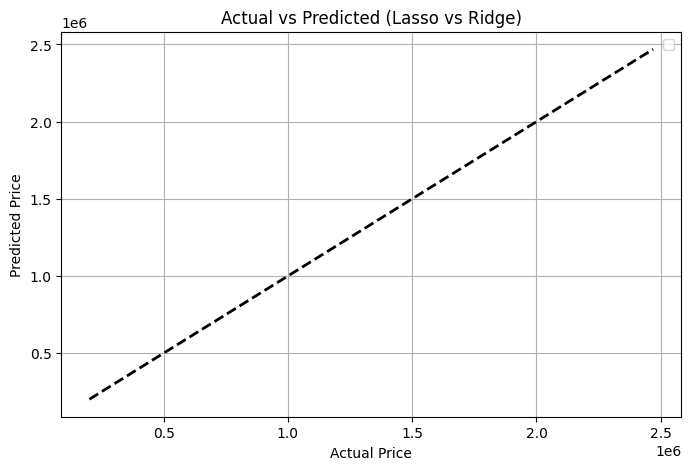

In [ ]:
plt.figure(figsize=(8,5))
for name, (y_pred, r2) in results.items():
    plt.scatter(y_test, y_pred, alpha=0.5, label=f"{name} (R²={r2:.3f})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Lasso vs Ridge)")
plt.legend()
plt.grid(True)
plt.show()